<a href="https://colab.research.google.com/github/ThomasMatthewEvans/Supervised-Machine-Learning/blob/master/Copy_of_Regression_Ablone_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introduction**

## Here we compare the preformance of a Support Vector Machine and a Artificial Neural Network for predicting the Rings in an Ablone shell.

## Intro to data also

## Overview of notebook

1.   Explore and visualise
2.   Preprocess ready for ML
3.   Assess via SVM
4.   Assess via ANN


In [1]:
# https://machinelearningmastery.com/results-for-standard-classification-and-regression-machine-learning-datasets/

# Here we predict the ablone dataset usign both tensorflow and sklearn

# We visualise, model, stack and model. Then set up a ANN to end

# Might have to alter the distributions of the x axis also
# remember use tensor flow and statsmodels and forests

In [2]:
# TODO

# Might be worth doing an ensemble model and not just jumping into the deeper models

# do the ANN

In [3]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint

# Example of Dropout on the Sonar Dataset: Hidden Layer
from pandas import read_csv
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import BatchNormalization

In [4]:
# Imports for plotting
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import pyplot


# Imports for statistcs
from statsmodels.graphics.gofplots import qqplot
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Imports for ML
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
import seaborn as sns
print(sns.__version__)
from pandas.plotting import scatter_matrix
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot
from scipy import stats

# Stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from numpy import mean
from numpy import std


# Machine Learning
import xgboost as xgb

from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split   
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.gaussian_process import GaussianProcessRegressor, kernels
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import VotingRegressor
#import eli5
#from eli5.sklearn import PermutationImportance
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import median_absolute_error
import time
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.metrics import mean_absolute_error as MAE





/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.11.1


In [5]:
# Imports for googlecolab
import pandas as pd
import io
from google.colab import files


# Upload the file with the data in it
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['Ablone (2).csv']))
# Dataset is now stored in a Pandas Dataframe

df

Saving Ablone (2).csv to Ablone (2).csv


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


## Data Exploration


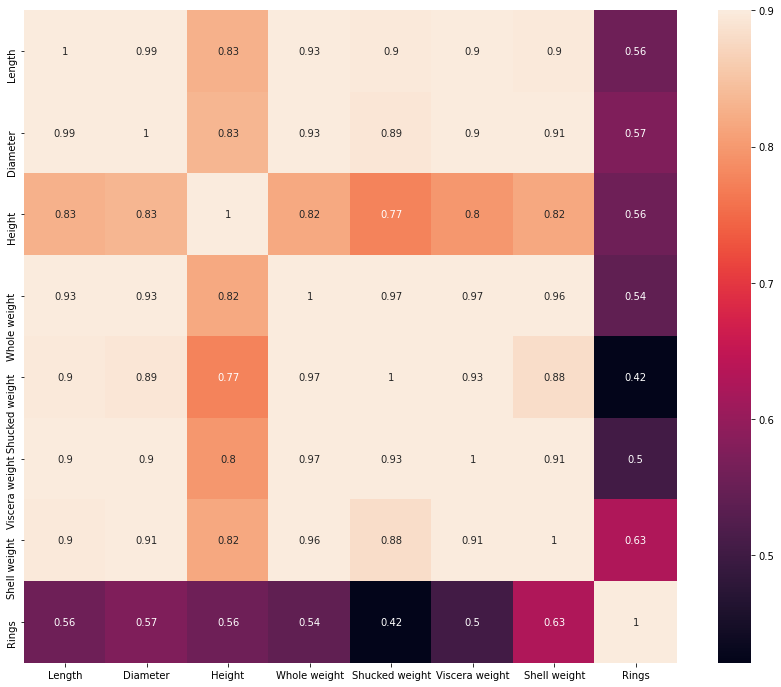

In [6]:
corr = df.corr()
plt.subplots(figsize=(15,12))

# Set the cmap for the below heatmap https://seaborn.pydata.org/tutorial/color_palettes.html
sns.diverging_palette(145, 300, s=60, as_cmap=True)

sns.heatmap(corr, vmax=0.9, square=True, annot = True)

Height looks unusuall, as shown it is positively correlated with all other inpts, however we canot tell much from the above correlation matrix so we carry out multiple dotplots to investigate further.

In [7]:
# Shucked weight is negatively correlated with rings
# Diamerer seems positively correlated with weight

# Big negative is that a number of the features seem to be positively correlated with each other indicating colinearity

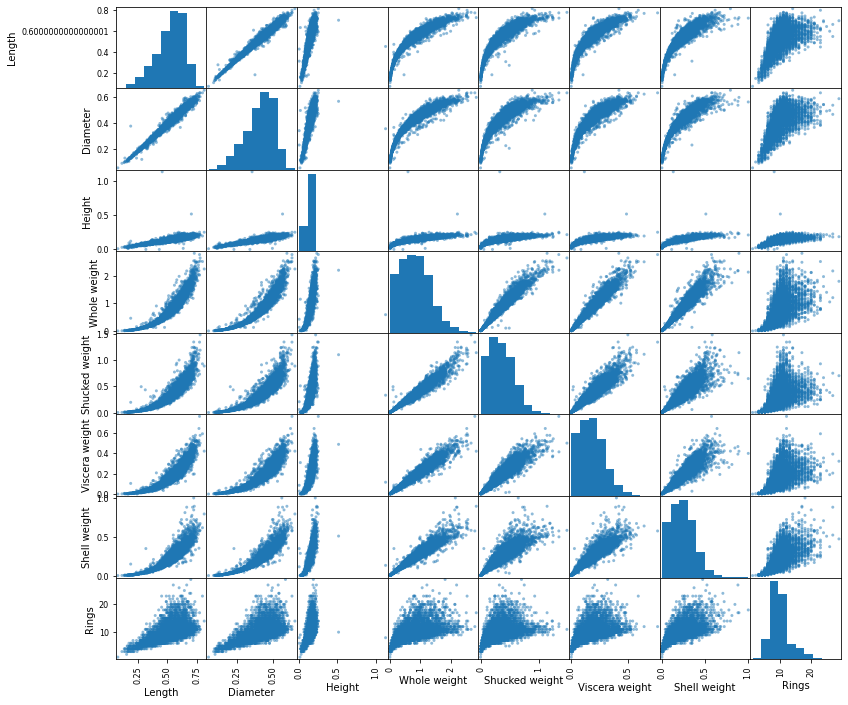

In [8]:
# We dig a little deeper from the above using a scatter matrix

plt.rcParams['figure.figsize'] = [13, 12]
scatter_matrix(df)
plt.show()

As shown height is indeed unusual, it is skewed by 2 high outliers (we will assume theya re outliers as they fall so far from the rest of the group). Viscera weight and Shell weight also have 2 or maybe 5 high points. Therefore we will remove all of these just to be on the safe side.

Drop some outliers

Now we look at the distributions to check for Left / Right Skew etc

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f558ba5bb90>,
      dtype=object)

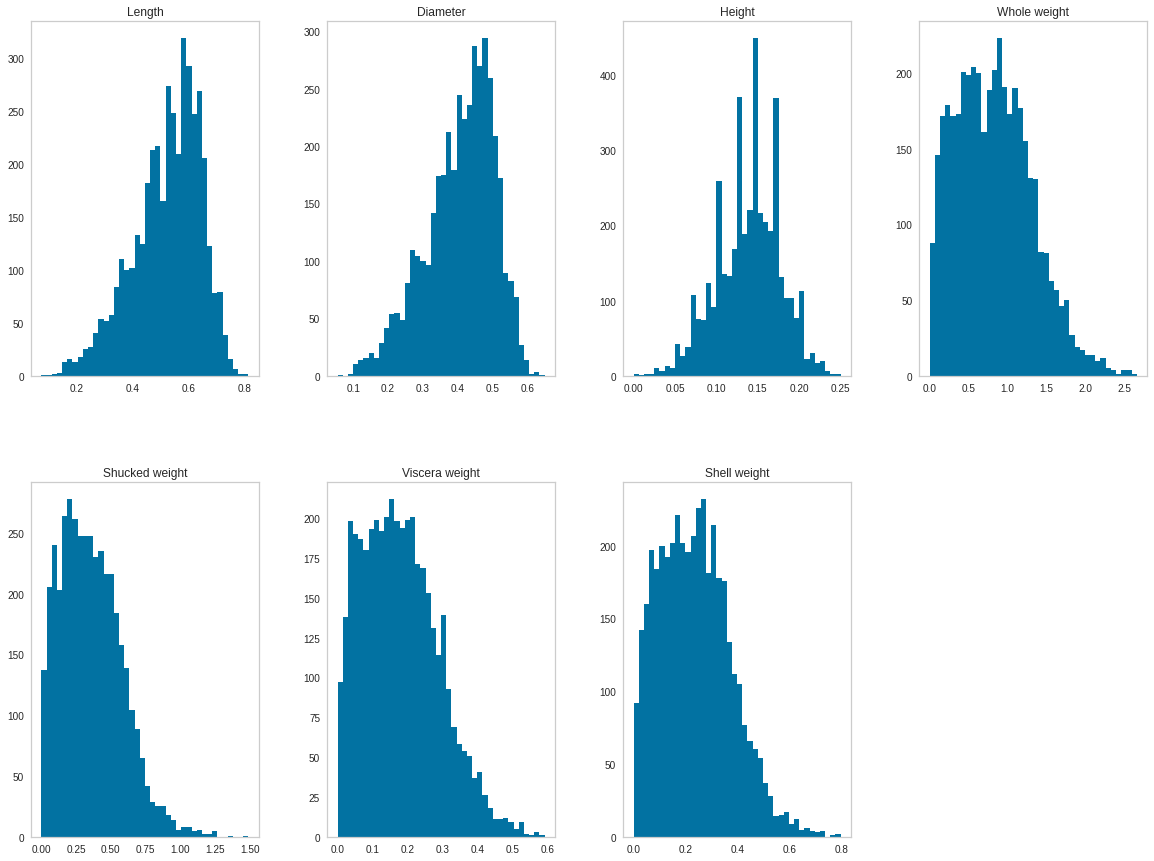

In [67]:
df.hist(figsize=(20,15), grid=False, layout=(2, 4), bins = 40)

In [10]:
#df.drop(df.index[df["Height (mm)"] >0.4], inplace = True)
df.drop(df.index[df["Height"] >0.4], inplace = True)

In [11]:
#df.drop(df.index[df["Viscera weight (g)"] >0.6], inplace = True)
df.drop(df.index[df["Viscera weight"] >0.6], inplace = True)

In [12]:
#df.drop(df.index[df["Shell weight (g)"] >0.8], inplace = True)
df.drop(df.index[df["Shell weight"] >0.8], inplace = True)

Repeat the above

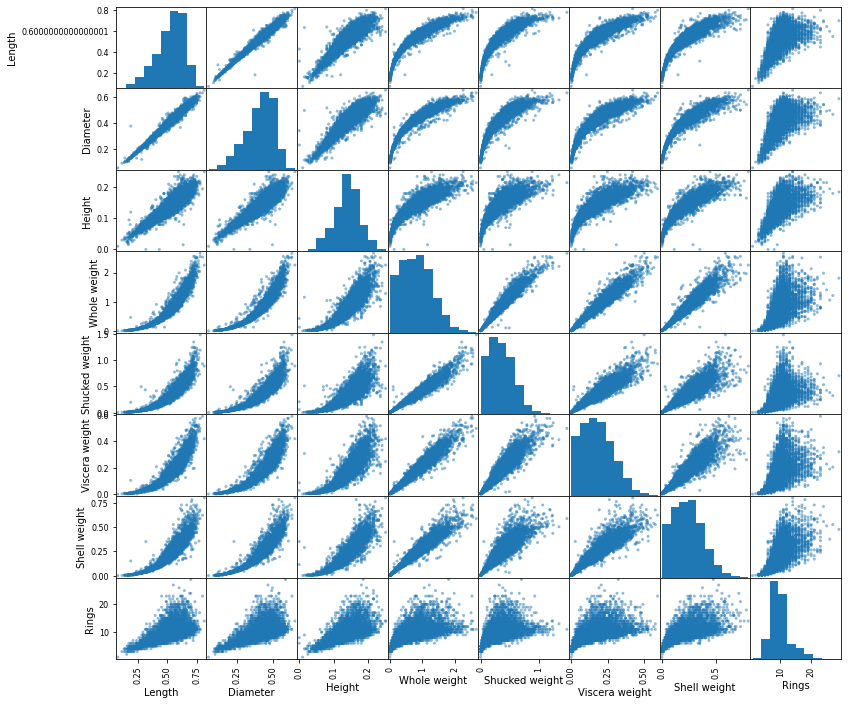

In [13]:
# We dig a little deeper from the above using a scatter matrix

plt.rcParams['figure.figsize'] = [13, 12]
scatter_matrix(df)
plt.show()

Now we can see there is a much better distribution for the 3 input dimensions, we can also see that a number of dimensions seem to have a co-linear relationship. So below we visualise diameter vs length and whole weight vs viscera weight.

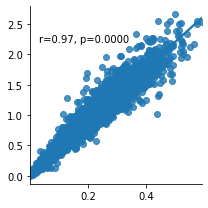

In [14]:
import seaborn as sns
import scipy as sp
from matplotlib.pyplot import *
import matplotlib.pyplot as plt

tips = df
g = sns.lmplot(x='Viscera weight', y='Whole weight', data=tips, height=3, aspect=1)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Viscera weight'], data['Whole weight'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.4f}'.format(r, p), transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.show()



# Sex	Length (mm)	Diameter (mm)	Height (mm)	Whole weight (g)	Shucked weight (g)	Viscera weight (g)	Shell weight (g)	Rings

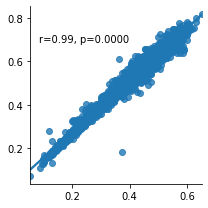

In [15]:
g = sns.lmplot(x='Diameter', y='Length', data=tips, height=3, aspect=1)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Diameter'], data['Length'])
    ax = plt.gca()
    ax.text(.05, .8, 'r={:.2f}, p={:.4f}'.format(r, p), transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.show()



# Sex	Length (mm)	Diameter (mm)	Height (mm)	Whole weight (g)	Shucked weight (g)	Viscera weight (g)	Shell weight (g)	Rings

As shown there is high correlation between these features, we could remove some, however as we have a high n and a low number of input dimensions we will leave them in for now.

In [16]:
print(df.describe())
print(df.info())

           Length     Diameter  ...  Shell weight        Rings
count  4167.00000  4167.000000  ...   4167.000000  4167.000000
mean      0.52359     0.407529  ...      0.237676     9.919846
std       0.11988     0.099035  ...      0.136824     3.205373
min       0.07500     0.055000  ...      0.001500     1.000000
25%       0.45000     0.350000  ...      0.130000     8.000000
50%       0.54500     0.425000  ...      0.233000     9.000000
75%       0.61500     0.480000  ...      0.326750    11.000000
max       0.81500     0.650000  ...      0.797500    29.000000

[8 rows x 8 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4167 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4167 non-null   object 
 1   Length          4167 non-null   float64
 2   Diameter        4167 non-null   float64
 3   Height          4167 non-null   float64
 4   Whole weight    4167 non-null 

##Set the y axis and distribution of the y axis


In [17]:
def set_and_explore_y(dataframe,y_input_string): 
  y = dataframe[y_input_string]
  # print(y)

  # Display a QQ plot to shcek normality before transformation
  qqplot(y, line='s')
  pyplot.show()
  
  #Now we drop the y from the dataframe
  dataframe=dataframe.drop([y_input_string],axis=1)
  ax=sns.displot(y, kind="kde", fill=True)
  return y


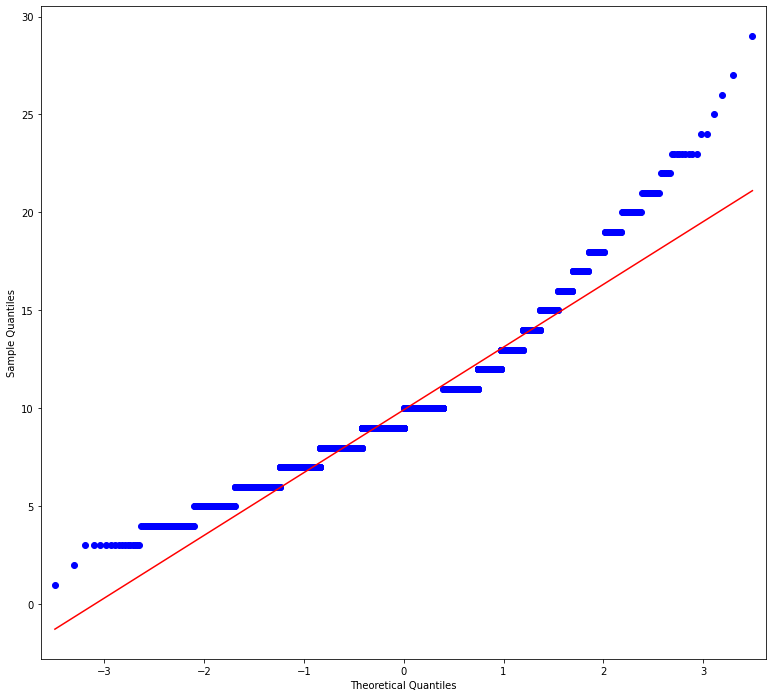

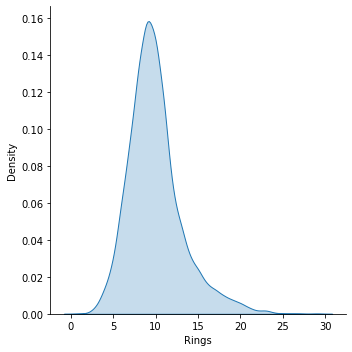

In [18]:
y = set_and_explore_y(df,"Rings")

df = df.drop(['Rings'], axis=1)

In [19]:
  # Take the y axis, box cox, print QQ and distribution

def box_cox_dist_explore(axis_of_interest):
   y_2,fitted_lambda = stats.boxcox(axis_of_interest)
   ax=sns.displot(y_2, kind="kde", fill=True)

   qqplot(y_2, line='s')
   pyplot.show()
   return y_2

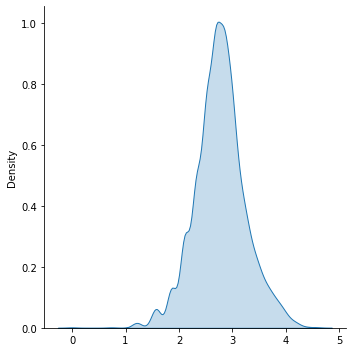

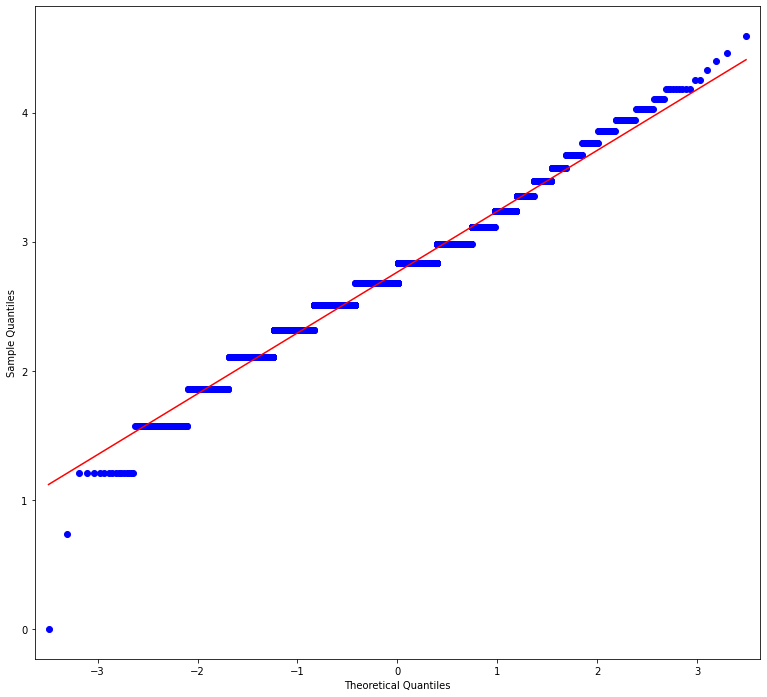

In [20]:
y = box_cox_dist_explore(y)

## Here we drop some features 

In [21]:
#df = df.drop(['Whole weight (g)','Height (mm)'], axis=1)

# Here we investigate the categorical variables and one-hot-encode them, we then min max scale all the continuous variables

In [22]:
## here we make a function to assign the categorical vlaues to an x matrix
def make_categorical_one_hot_x_matrix(input_x_dataframe):
    
    categorical_feature_mask = input_x_dataframe.dtypes==object                 # filter categorical columns using mask and turn it into a list
    categorical_cols = input_x_dataframe.columns[categorical_feature_mask].tolist()
    print(categorical_cols)
    
    # Now we repeat the above for non categorical data (or continous features)

    con_feature_mask = input_x_dataframe.dtypes== float                          # filter categorical columns using mask and turn it into a list
    con_cols = input_x_dataframe.columns[con_feature_mask].tolist()
    print(con_cols)
    
    # https://towardsdatascience.com/the-dummys-guide-to-creating-dummy-variables-f21faddb1d40
    # here we try the get dummies with pandas
    dummy = pd.get_dummies(input_x_dataframe[categorical_cols])
    dummy.head()
    
    input_x_dataframe = pd.concat([input_x_dataframe,dummy],axis=1)
    input_x_dataframe.head()
    
    # now we need to drop the original non categorical features from the dataframe
    #dataset = pd.drop(dataset[categorical_cols],axis=1)


    i=0
    total_number_of_columns_to_remove = len(categorical_cols)
    while i < total_number_of_columns_to_remove:
    
        # This is the part that removes the categorical columns by the names we set earlier
    
        input_x_dataframe=input_x_dataframe.drop([categorical_cols[i]],axis=1)
        i = i+1

    input_x_dataframe.head()
    
    return(input_x_dataframe, con_cols, categorical_cols)

# Here we call the funciton and assign 3 variables to it, we need this in order for th pipelines to work
# later on
dataset2, con_cols, ategorical_cols  = make_categorical_one_hot_x_matrix(df)
dataset = dataset2
print(dataset)

['Sex']
['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']
      Length  Diameter  Height  Whole weight  ...  Shell weight  Sex_F  Sex_I  Sex_M
0      0.455     0.365   0.095        0.5140  ...        0.1500      0      0      1
1      0.350     0.265   0.090        0.2255  ...        0.0700      0      0      1
2      0.530     0.420   0.135        0.6770  ...        0.2100      1      0      0
3      0.440     0.365   0.125        0.5160  ...        0.1550      0      0      1
4      0.330     0.255   0.080        0.2050  ...        0.0550      0      1      0
...      ...       ...     ...           ...  ...           ...    ...    ...    ...
4172   0.565     0.450   0.165        0.8870  ...        0.2490      1      0      0
4173   0.590     0.440   0.135        0.9660  ...        0.2605      0      0      1
4174   0.600     0.475   0.205        1.1760  ...        0.3080      0      0      1
4175   0.625     0.485   0.150        1.0

In [23]:
# Scale the x axis using min max scaler


scaler = MinMaxScaler()
scaler.fit(dataset)
print(scaler.transform(dataset))

[[0.51351351 0.5210084  0.38       ... 0.         0.         1.        ]
 [0.37162162 0.35294118 0.36       ... 0.         0.         1.        ]
 [0.61486486 0.61344538 0.54       ... 1.         0.         0.        ]
 ...
 [0.70945946 0.70588235 0.82       ... 0.         0.         1.        ]
 [0.74324324 0.72268908 0.6        ... 1.         0.         0.        ]
 [0.85810811 0.84033613 0.78       ... 0.         0.         1.        ]]


In [24]:
dataset = scaler.transform(dataset)

In [25]:
dataset

array([[0.51351351, 0.5210084 , 0.38      , ..., 0.        , 0.        ,
        1.        ],
       [0.37162162, 0.35294118, 0.36      , ..., 0.        , 0.        ,
        1.        ],
       [0.61486486, 0.61344538, 0.54      , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.70945946, 0.70588235, 0.82      , ..., 0.        , 0.        ,
        1.        ],
       [0.74324324, 0.72268908, 0.6       , ..., 1.        , 0.        ,
        0.        ],
       [0.85810811, 0.84033613, 0.78      , ..., 0.        , 0.        ,
        1.        ]])

In [26]:
# Scale the x axis using the min max scaler

sc_y = MinMaxScaler()
# The reahape should be changed to values.reshape if this a nparray
# y_scaled = sc_y.fit_transform(y.values.reshape(-1,1))
y_scaled = sc_y.fit_transform(y.reshape(-1,1))
y=y_scaled

In [27]:
# wE TAKE 10% out here for our final analysis

#X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(dataset, y, test_size = 0.10, random_state=22)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size = 0.10, random_state=234)

In [29]:
def fit_baseline_ml_model(model_id,x_tr,y_tr,x_te,y_te):
    
    """
    Takes in the model, fits it and gets the train and test R2, RMSE, then the actual by predicted
    # Usually good for a starting point
    # Need to define the model outside of this function like so clf = RandomForestRegressor()
    
    """
    
    #from matplotlib import pyplot as plt
    model_id.fit(x_tr,y_tr.ravel())
    print(model_id)            # QC Test
    print("Train Score: {:.2f}".format(model_id.score(x_tr,y_tr)))
    print("Test Score: {:.2f}".format(model_id.score(x_te,y_te)))
    

    y_pred_dt = model_id.predict(x_te)
    #plt.scatter(X_test, y_test, color = 'red')   # Here the train values is set to the test vales
    plt.scatter(y_te, y_pred_dt, color ='blue')
    plt.title('Actual by Predicted for Chosen Model')
    plt.xlabel('Actual')
    plt.ylabel('Predicted')

    # Print the RMSE also for convenience
    rmse = np.sqrt(mean_squared_error(y_te, y_pred_dt))
    print("RMSE: {:.2f}".format(rmse))

    # Print the MAE
    mae = median_absolute_error(y_te, y_pred_dt)
    print("MAE:{:.2f}".format(mae))
    
    mse = mean_squared_error(y_te, y_pred_dt)
    print("MSE:{:.2f}".format(mse))


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Train Score: 0.62
Test Score: 0.65
RMSE: 0.06
MAE:0.04
MSE:0.00


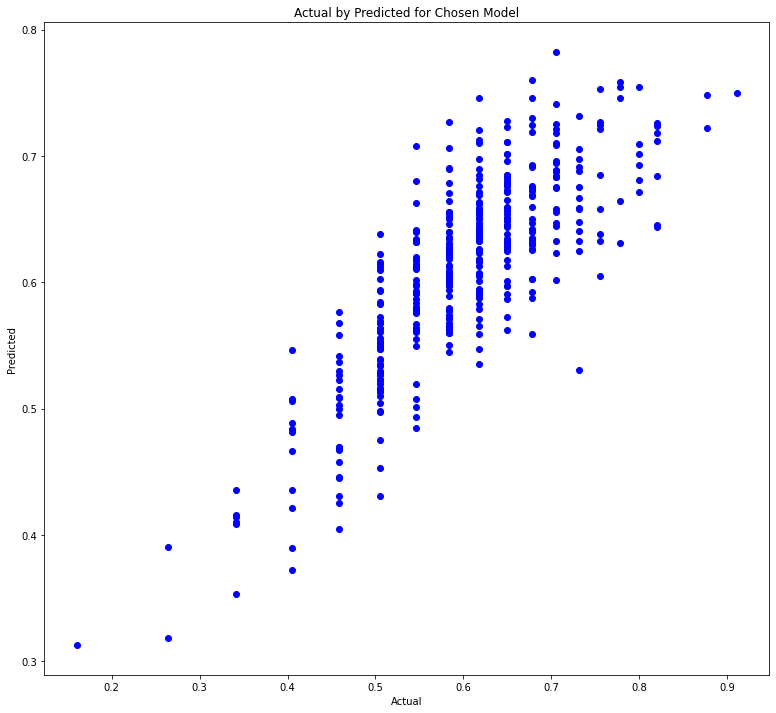

In [30]:
clf = SVR()


fit_baseline_ml_model(clf,X_train,y_train,X_test,y_test)

Now we start SVR modelling.
We will run 3 different kernels.



1.   Linear
2.   Quadratic
3.   RBF



Here we gridsearch and CV the training set only

In [31]:
# Here we make a function to carry out a manafold validation it will be used on the 3 kernels
param_grid = { 'C':[1, 10, 100, 1000],'kernel':['linear'],'gamma': [1, 0.1, 0.01]}


def train_machine(input_param_grid,cross_val_splits):
  
  grid = GridSearchCV(SVR(),input_param_grid,cv=cross_val_splits)
  y_new = np.ravel(y_train)
  grid.fit(X_train,y_new)
  print("Best Model Hyperparameters")
  print(grid.best_params_)
  print("R^2 on test set")
  print(grid.score(X_test,y_test))

train_machine(param_grid,3)
  

Best Model Hyperparameters
{'C': 1000, 'gamma': 1, 'kernel': 'linear'}
R^2 on test set
0.6312218336514781


In [32]:
# Now we moove on to a RBF kernel
# so we call the same function as earlier but with the param grid updated for the new model

param_grid = { 'C':[0.1, 1, 10, 100, 1000],'kernel':['rbf'],'gamma': [1, 0.1, 0.01, 0.001,'scale']}
train_machine(param_grid,3)

Best Model Hyperparameters
{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}
R^2 on test set
0.6465442166666233


Below we repeat the above with the quardatic kernal, this could eb done in the same gridsearch above however we want to keep it seperate for convenience

In [33]:
param_grid = { 'C':[100, 1000],'kernel':['poly'],'gamma': [1, 0.1]}
train_machine(param_grid,2)

Best Model Hyperparameters
{'C': 1000, 'gamma': 0.1, 'kernel': 'poly'}
R^2 on test set
0.645022881692862


# Now fit the best model to the whole data and use it to predict the test set.



SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Train Score: 0.63
Test Score: 0.65
RMSE: 0.06
MAE:0.04
MSE:0.00


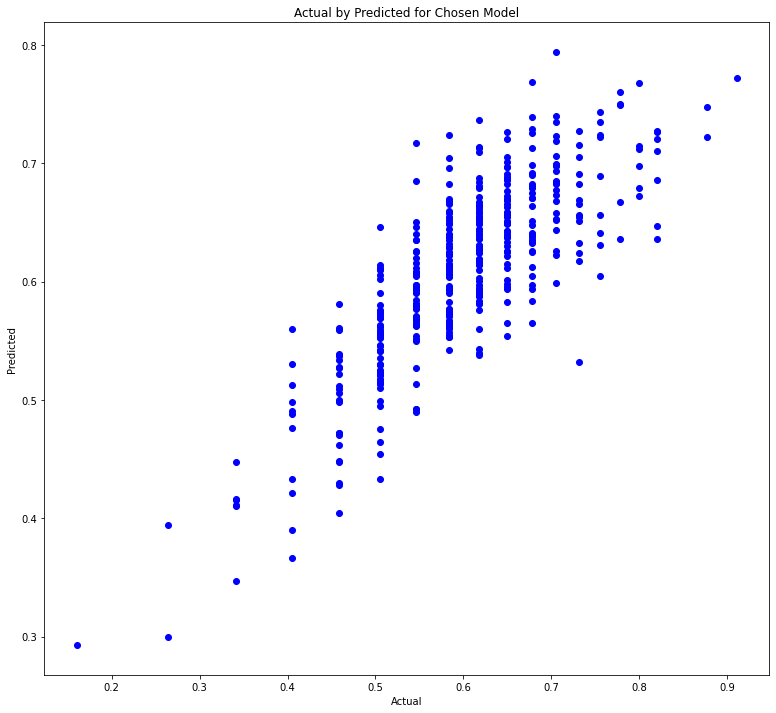

In [34]:
# Fit the final model and assess the summary statistics
clf = SVR(C = 100, gamma = 0.1, kernel = 'rbf')

fit_baseline_ml_model(clf,X_train,y_train,X_test,y_test)

In [35]:
# TODO

# Print the importances of each factor / look at a 

In [36]:
y2 = y+1

In [37]:
y2

array([[1.75512129],
       [1.50518633],
       [1.58393526],
       ...,
       [1.58393526],
       [1.61799764],
       [1.67845037]])

In [38]:
y

array([[0.75512129],
       [0.50518633],
       [0.58393526],
       ...,
       [0.58393526],
       [0.61799764],
       [0.67845037]])

In [39]:
y=y2

In [40]:
# wE TAKE 10% out here for our final analysis

#X_train_pre, X_test_pre, y_train_pre, y_test_pre = train_test_split(dataset, y, test_size = 0.10, random_state=22)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, test_size = 0.20, random_state=22)

## Lets set up the ANN from TF

In [42]:
# add one to each part of the column to be sure it will work


In [43]:
#Custom RMSE below
#
#
#
#
#

#
#
#
#    https://stackoverflow.com/questions/43855162/rmse-rmsle-loss-function-in-keras

In [44]:
# Define a simple sequential model
# Might need to look into dropout later
# TODO - sort custom optimizer


from tensorflow.keras import backend as K

def create_model():
  model = tf.keras.models.Sequential([
    keras.layers.Dense((80), activation='relu',input_shape=(10,)),
    keras.layers.Dense((70),activation='relu'),
    keras.layers.Dense((60),activation='relu'),
    keras.layers.Dense((40),activation='relu'),
    # we must set this output layer to 1 as if not the NN will not be able to save
    keras.layers.Dense((1),activation='relu')
  ])

  #model.compile(tf.compat.v1.train.GradientDescentOptimizer(learning_rate),
  #            loss=tf.keras.metrics.mean_squared_error,
  #            metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')])
  #return model

  #model.compile(optimizer = "rmsprop", loss = root_mean_squared_error, metrics =[tf.keras.metrics.RootMeanSquaredError()])
  
  model.compile(optimizer='adam',loss='mean_squared_error',metrics=['MSE'])
  return model
   #           
  #           )


# 'mean_squared_logarithmic_error'
# 'mean_squared_error'

"""
this is the old optimizer

  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer='adam',
                loss='root_mean_squared_error',
                metrics=[tf.keras.metrics.RootMeanSquaredError()])
"""

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 



  #optimizer='sgd',
  #loss='mse',
  #metrics=[tf.keras.metrics.MeanAbsoluteError()])
  
  #model.compile(optimizer='adam',
  #           loss='mean_squared_error',
  #           metrics=['MSE'])




# Create a basic model instance
model = create_model()

# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 80)                880       
_________________________________________________________________
dense_1 (Dense)              (None, 70)                5670      
_________________________________________________________________
dense_2 (Dense)              (None, 60)                4260      
_________________________________________________________________
dense_3 (Dense)              (None, 40)                2440      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 41        
Total params: 13,291
Trainable params: 13,291
Non-trainable params: 0
_________________________________________________________________


In [45]:
hist = model.fit(X_train, y_train,
          batch_size=200, epochs=20,
          validation_data=(X_test,y_test))

Epoch 1/20
17/17 [==============================] - 1s 20ms/step - loss: 1.2255 - MSE: 1.2255 - val_loss: 0.0601 - val_MSE: 0.0601
Epoch 2/20
17/17 [==============================] - 0s 7ms/step - loss: 0.1085 - MSE: 0.1085 - val_loss: 0.0543 - val_MSE: 0.0543
Epoch 3/20
17/17 [==============================] - 0s 5ms/step - loss: 0.0328 - MSE: 0.0328 - val_loss: 0.0232 - val_MSE: 0.0232
Epoch 4/20
17/17 [==============================] - 0s 4ms/step - loss: 0.0132 - MSE: 0.0132 - val_loss: 0.0089 - val_MSE: 0.0089
Epoch 5/20
17/17 [==============================] - 0s 5ms/step - loss: 0.0071 - MSE: 0.0071 - val_loss: 0.0065 - val_MSE: 0.0065
Epoch 6/20
17/17 [==============================] - 0s 7ms/step - loss: 0.0054 - MSE: 0.0054 - val_loss: 0.0054 - val_MSE: 0.0054
Epoch 7/20
17/17 [==============================] - 0s 5ms/step - loss: 0.0050 - MSE: 0.0050 - val_loss: 0.0052 - val_MSE: 0.0052
Epoch 8/20
17/17 [==============================] - 0s 6ms/step - loss: 0.0049 - MSE: 0.0

In [46]:
y_pred = model.predict(X_test)
print(y_pred)
print(y_test)
y22=y_pred[:,0] 

print("x val set")
print(X_test)


print("change shape")
print(y22)


[[1.5795573]
 [1.3506289]
 [1.6478508]
 [1.5285319]
 [1.5454161]
 [1.6368569]
 [1.6219544]
 [1.6696262]
 [1.7236519]
 [1.5845792]
 [1.6071794]
 [1.572084 ]
 [1.5661777]
 [1.6391215]
 [1.5972847]
 [1.6127459]
 [1.65831  ]
 [1.5945219]
 [1.6801336]
 [1.6241372]
 [1.6232653]
 [1.6661328]
 [1.6564356]
 [1.6009874]
 [1.6786201]
 [1.5985708]
 [1.6205133]
 [1.7342188]
 [1.6641064]
 [1.5967133]
 [1.5287855]
 [1.6459646]
 [1.5934343]
 [1.7758069]
 [1.6285145]
 [1.6743984]
 [1.6081157]
 [1.589676 ]
 [1.6312445]
 [1.7539593]
 [1.5510495]
 [1.6409098]
 [1.6562107]
 [1.6560428]
 [1.6038606]
 [1.6035755]
 [1.6618645]
 [1.633321 ]
 [1.6899844]
 [1.6671317]
 [1.5120695]
 [1.5857905]
 [1.6232752]
 [1.602263 ]
 [1.729141 ]
 [1.4639838]
 [1.6413918]
 [1.6151714]
 [1.6165503]
 [1.4715984]
 [1.4713802]
 [1.6516385]
 [1.6347786]
 [1.633711 ]
 [1.5943896]
 [1.6291392]
 [1.5647185]
 [1.5921816]
 [1.5322895]
 [1.6223378]
 [1.639524 ]
 [1.7476159]
 [1.5422442]
 [1.6220192]
 [1.3233217]
 [1.6078146]
 [1.6026952]

In [47]:
def mat_scatter(x,y,xaxs,yaxs,legend):
    #Colour is blue, alpha is size
    plt.scatter(x, y, color='b')
    plt.xlabel(xaxs)
    plt.ylabel(yaxs)
    plt.title('Actual by Predicted - Full Model')
    plt.legend(loc='upper left')
    #plt.plot(x, y, )
    plt.show()

No handles with labels found to put in legend.


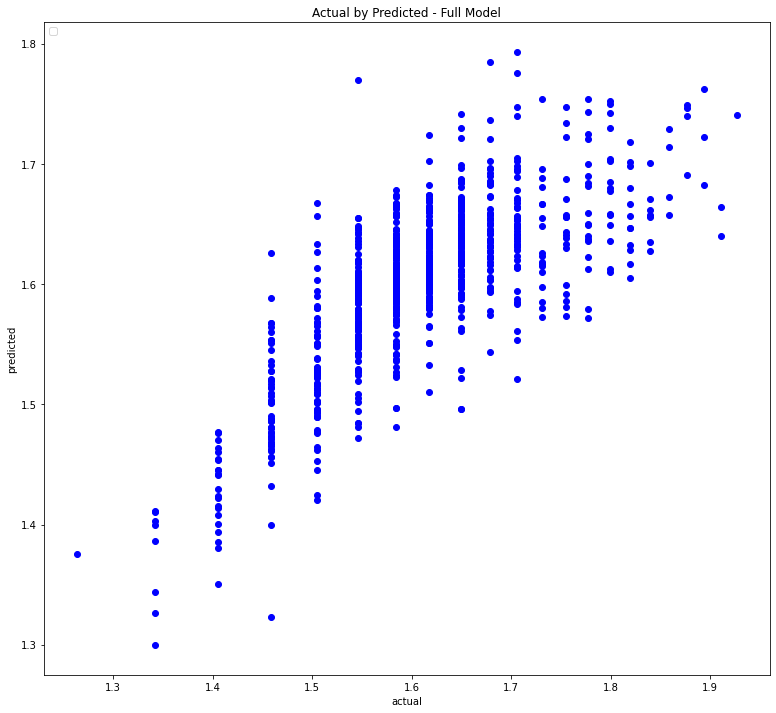

In [48]:
mat_scatter(y_test,y22,"actual","predicted","x")

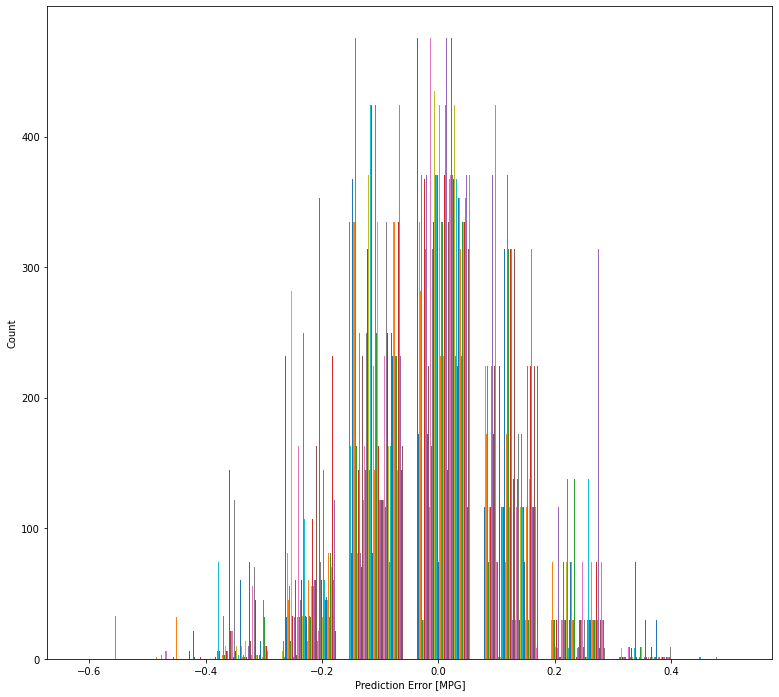

In [49]:
error = y22 - y_test 
plt.hist(error, bins=10)
plt.xlabel('Prediction Error [MPG]')
_ = plt.ylabel('Count')

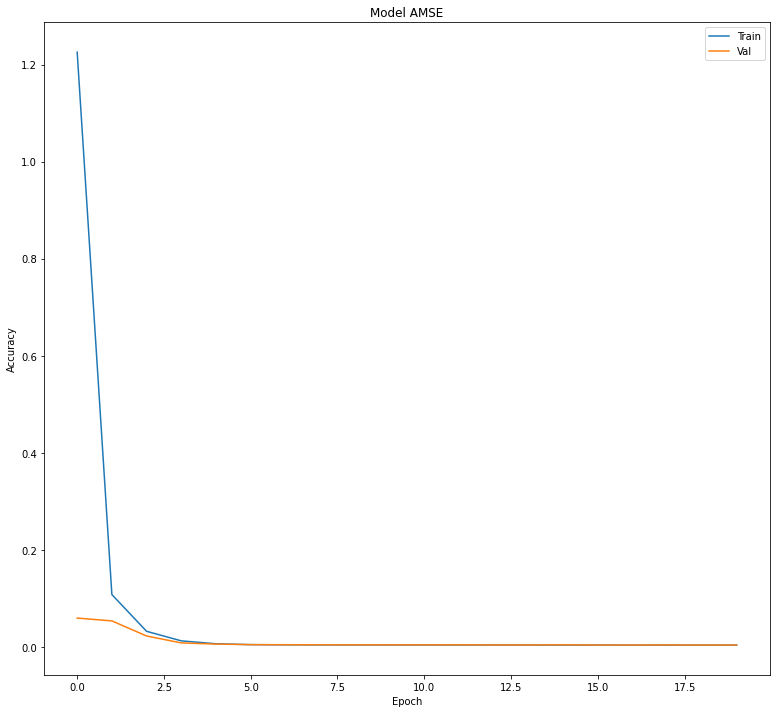

In [50]:
plt.plot(hist.history['MSE'])
plt.plot(hist.history['val_MSE'])
plt.title('Model AMSE')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

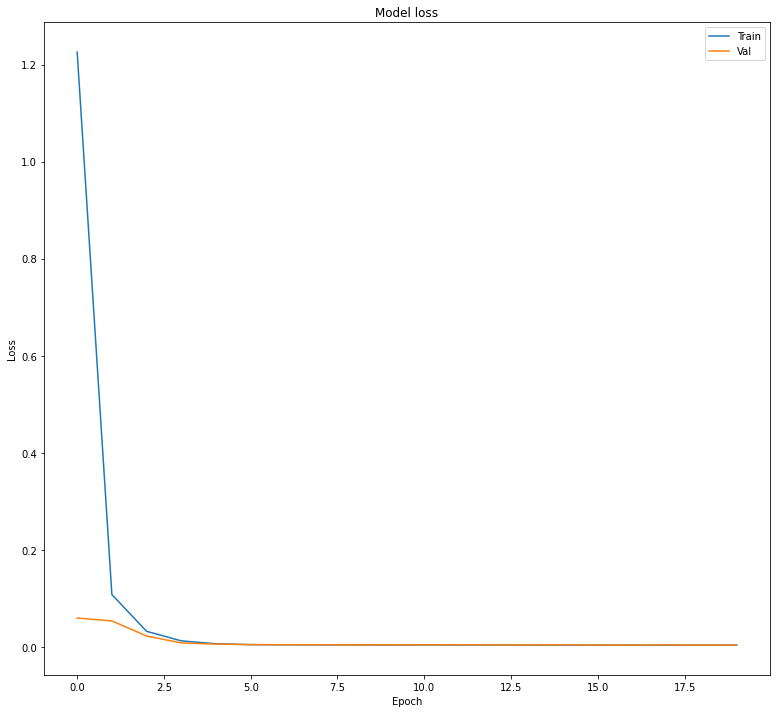

In [51]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Now we remove the dimensions explored and run the best models again to see if they work.

In [52]:
dataset2

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1,0,0


In [53]:
dataset3 = dataset2.drop(['Diameter', 'Whole weight'], axis=1)

In [54]:
dataset3

,Length,Height,Shucked weight,Viscera weight,Shell weight,Sex_F,Sex_I,Sex_M
0,0.455,0.095,0.2245,0.1010,0.1500,0,0,1
1,0.350,0.090,0.0995,0.0485,0.0700,0,0,1
2,0.530,0.135,0.2565,0.1415,0.2100,1,0,0
3,0.440,0.125,0.2155,0.1140,0.1550,0,0,1
4,0.330,0.080,0.0895,0.0395,0.0550,0,1,0
...,...,...,...,...,...,...,...,...
4172,0.565,0.165,0.3700,0.2390,0.2490,1,0,0
4173,0.590,0.135,0.4390,0.2145,0.2605,0,0,1
4174,0.600,0.205,0.5255,0.2875,0.3080,0,0,1
4175,0.625,0.150,0.5310,0.2610,0.2960,1,0,0


In [55]:
# Scale the x axis using min max scaler


scaler = MinMaxScaler()
scaler.fit(dataset3)
print(scaler.transform(dataset3))

[[0.51351351 0.38       0.15030262 ... 0.         0.         1.        ]
 [0.37162162 0.36       0.06624075 ... 0.         0.         1.        ]
 [0.61486486 0.54       0.17182246 ... 1.         0.         0.        ]
 ...
 [0.70945946 0.82       0.3527236  ... 0.         0.         1.        ]
 [0.74324324 0.6        0.35642233 ... 1.         0.         0.        ]
 [0.85810811 0.78       0.63517149 ... 0.         0.         1.        ]]


In [56]:
dataset3 = scaler.transform(dataset3)

In [57]:
dataset3

array([[0.51351351, 0.38      , 0.15030262, ..., 0.        , 0.        ,
        1.        ],
       [0.37162162, 0.36      , 0.06624075, ..., 0.        , 0.        ,
        1.        ],
       [0.61486486, 0.54      , 0.17182246, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.70945946, 0.82      , 0.3527236 , ..., 0.        , 0.        ,
        1.        ],
       [0.74324324, 0.6       , 0.35642233, ..., 1.        , 0.        ,
        0.        ],
       [0.85810811, 0.78      , 0.63517149, ..., 0.        , 0.        ,
        1.        ]])

In [58]:
X_train, X_test, y_train, y_test = train_test_split(dataset3, y, test_size = 0.10, random_state=234)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
Train Score: 0.60
Test Score: 0.64
RMSE: 0.06
MAE:0.04
MSE:0.00


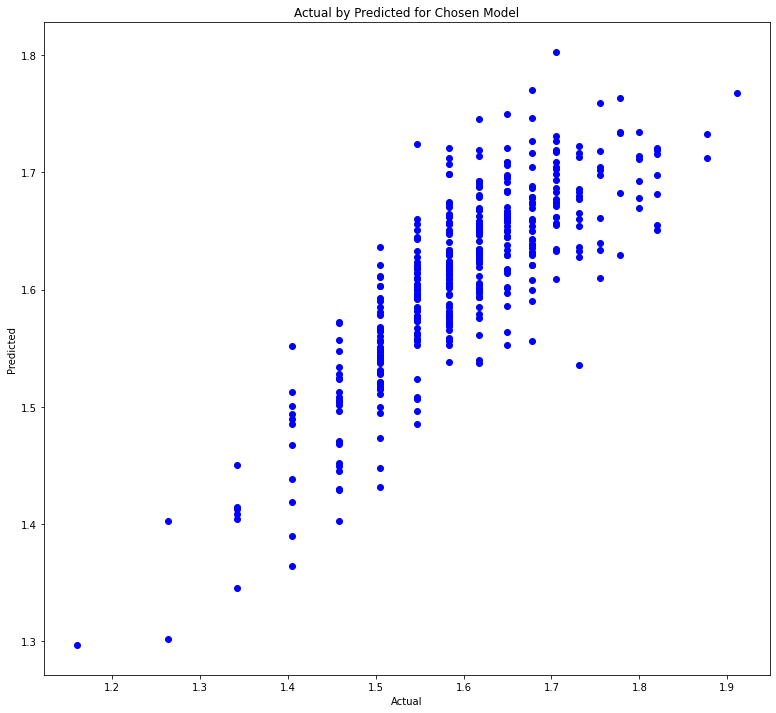

In [59]:
# Fit the final model and assess the summary statistics
clf = SVR(C = 100, gamma = 0.1, kernel = 'rbf')
#clf=SVR()
fit_baseline_ml_model(clf,X_train,y_train,X_test,y_test)

In [60]:
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import ResidualsPlot

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [61]:
model = SVR()

In [62]:
print(len(X_train))
print(len(y_train))

3750
3750


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored

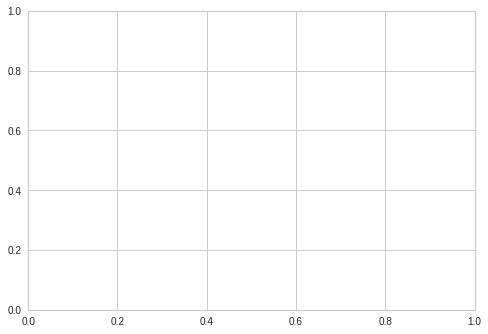

In [63]:
visualizer = ResidualsPlot(model, hist=False)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

In [ ]:
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()